# Feature Selection

When building a machine learning model in real-life, it’s almost rare that all the variables in the dataset are useful to build a model. Adding redundant variables reduces the generalization capability of the model and may also reduce the overall accuracy of a classifier. Furthermore adding more and more variables to a model increases the overall complexity of the model.

# Goal
- The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build useful models of studied phenomena.

# Methods

A. Filter methods

B. Wrapper methods

C. Embedded methods

D. Hybrid methods

# Filter methods:
- Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. 
- These methods are faster and less computationally expensive than wrapper methods.
- When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('mobile-price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [219]:
df.keys()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [14]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
X=df.drop('price_range',axis=1)
y=df[['price_range']]

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Information Gain

In [10]:
from sklearn.feature_selection import mutual_info_classif

In [18]:
mutual_info=mutual_info_classif(X_train,y_train)

In [19]:
mutual_info

array([0.03581047, 0.00760912, 0.00403918, 0.        , 0.00433738,
       0.01033859, 0.01341386, 0.00542638, 0.02136095, 0.        ,
       0.        , 0.03056599, 0.02293404, 0.85106135, 0.01110293,
       0.        , 0.        , 0.02199677, 0.        , 0.        ])

In [20]:
mutual_info=pd.Series(mutual_info)
mutual_info

0     0.035810
1     0.007609
2     0.004039
3     0.000000
4     0.004337
5     0.010339
6     0.013414
7     0.005426
8     0.021361
9     0.000000
10    0.000000
11    0.030566
12    0.022934
13    0.851061
14    0.011103
15    0.000000
16    0.000000
17    0.021997
18    0.000000
19    0.000000
dtype: float64

In [21]:
mutual_info.index

RangeIndex(start=0, stop=20, step=1)

In [22]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [23]:
mutual_info.index=X_train.columns

In [27]:
mutual_info.sort_values(ascending=False)

ram              0.851061
battery_power    0.035810
px_height        0.030566
px_width         0.022934
three_g          0.021997
mobile_wt        0.021361
int_memory       0.013414
sc_h             0.011103
four_g           0.010339
blue             0.007609
m_dep            0.005426
fc               0.004337
clock_speed      0.004039
talk_time        0.000000
touch_screen     0.000000
pc               0.000000
sc_w             0.000000
n_cores          0.000000
dual_sim         0.000000
wifi             0.000000
dtype: float64

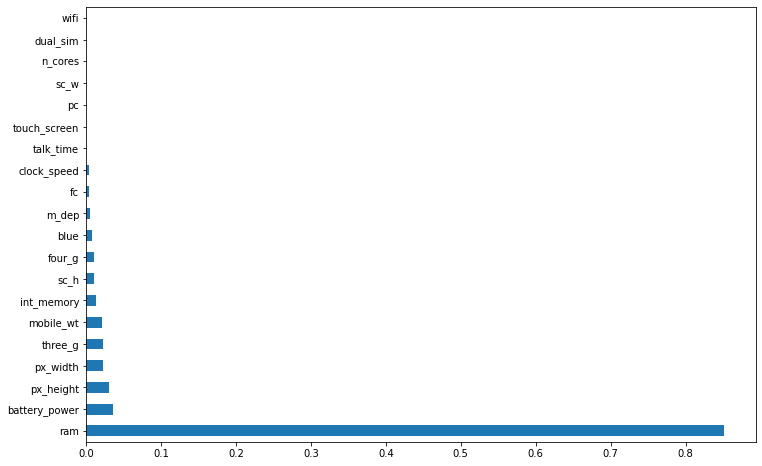

In [30]:
mutual_info.sort_values(ascending=False).plot.barh(figsize=(12,8));

In [31]:
mutual_info.sort_values(ascending=False).nlargest(5)

ram              0.851061
battery_power    0.035810
px_height        0.030566
px_width         0.022934
three_g          0.021997
dtype: float64

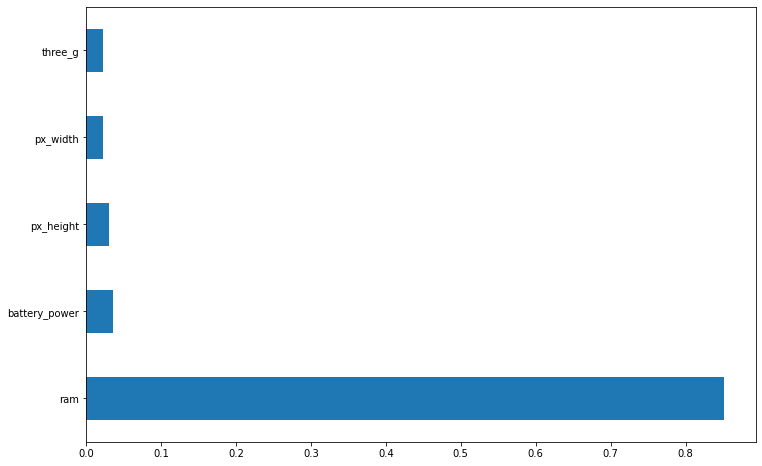

In [32]:
mutual_info.sort_values(ascending=False).nlargest(5).plot.barh(figsize=(12,8));

### SelectKBest

In [254]:
from sklearn.feature_selection import SelectKBest

In [255]:
#Now we Will select the  top 5 important features
top_5_features = SelectKBest(mutual_info_classif, k=5)
top_5_features.fit(X_train, y_train)
X_train.columns[top_5_features.get_support()]

Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')

### SelectPercentile

In [33]:
from sklearn.feature_selection import SelectPercentile

In [41]:
top_columns=SelectPercentile(mutual_info_classif, percentile=20)
top_columns.fit(X_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_classif at 0x0000014026CADF70>)

In [42]:
top_columns.get_support()

array([ True, False, False, False, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False])

In [43]:
X_train.columns[top_columns.get_support()]

Index(['battery_power', 'm_dep', 'px_height', 'ram'], dtype='object')

# Chi-square Test


if there is any categorical columns, should be converted into integers

In [49]:
from sklearn.feature_selection import chi2

In [50]:
f_p_values=chi2(X_train,y_train)

In [51]:
f_p_values

(array([1.01757960e+04, 4.81259294e-01, 1.22550663e+00, 7.58327074e-01,
        1.40097534e+01, 1.11328901e+00, 1.29886693e+02, 1.01047174e+00,
        5.83136275e+01, 1.76894150e+00, 9.66696670e+00, 1.27828009e+04,
        6.83695367e+03, 6.49917287e+05, 7.56122723e+00, 1.33071663e+01,
        7.79008964e+00, 8.05537200e-01, 2.23306807e+00, 1.37534847e+00]),
 array([0.00000000e+00, 9.22988945e-01, 7.46893491e-01, 8.59406427e-01,
        2.89190674e-03, 7.73867070e-01, 5.72125300e-28, 7.98718125e-01,
        1.34724498e-12, 6.21716822e-01, 2.16198755e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.60059575e-02, 4.01730582e-03,
        5.05550920e-02, 8.48142155e-01, 5.25464396e-01, 7.11323222e-01]))

In [52]:
p_values=pd.Series(f_p_values[1])
p_values

0     0.000000e+00
1     9.229889e-01
2     7.468935e-01
3     8.594064e-01
4     2.891907e-03
5     7.738671e-01
6     5.721253e-28
7     7.987181e-01
8     1.347245e-12
9     6.217168e-01
10    2.161988e-02
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    5.600596e-02
15    4.017306e-03
16    5.055509e-02
17    8.481422e-01
18    5.254644e-01
19    7.113232e-01
dtype: float64

In [53]:
p_values.index=X_train.columns
p_values

battery_power    0.000000e+00
blue             9.229889e-01
clock_speed      7.468935e-01
dual_sim         8.594064e-01
fc               2.891907e-03
four_g           7.738671e-01
int_memory       5.721253e-28
m_dep            7.987181e-01
mobile_wt        1.347245e-12
n_cores          6.217168e-01
pc               2.161988e-02
px_height        0.000000e+00
px_width         0.000000e+00
ram              0.000000e+00
sc_h             5.600596e-02
sc_w             4.017306e-03
talk_time        5.055509e-02
three_g          8.481422e-01
touch_screen     5.254644e-01
wifi             7.113232e-01
dtype: float64

In [57]:
p_values.sort_values().nlargest(5)

blue        0.922989
dual_sim    0.859406
three_g     0.848142
m_dep       0.798718
four_g      0.773867
dtype: float64

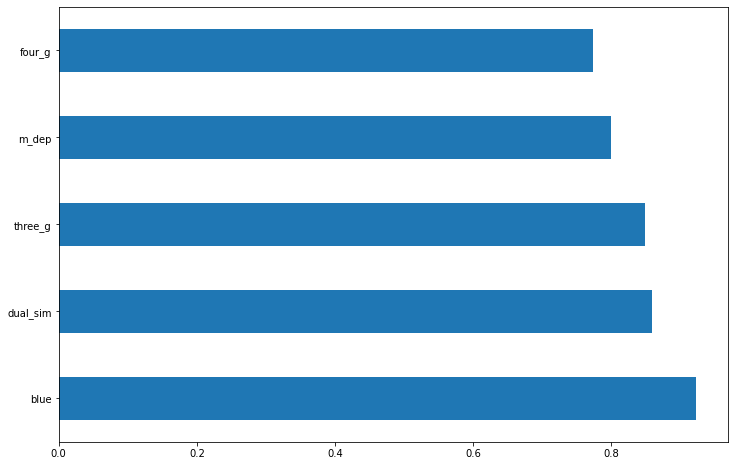

In [83]:
p_values.sort_values().nlargest(5).plot.barh(figsize=(12,8));

### SelectKBest

In [60]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [68]:
features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X_train,y_train)

In [69]:
fit.scores_

array([1.01757960e+04, 4.81259294e-01, 1.22550663e+00, 7.58327074e-01,
       1.40097534e+01, 1.11328901e+00, 1.29886693e+02, 1.01047174e+00,
       5.83136275e+01, 1.76894150e+00, 9.66696670e+00, 1.27828009e+04,
       6.83695367e+03, 6.49917287e+05, 7.56122723e+00, 1.33071663e+01,
       7.79008964e+00, 8.05537200e-01, 2.23306807e+00, 1.37534847e+00])

In [70]:
X_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [75]:
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(X_train.columns)
best_features=pd.concat([columns,scores],axis=1)

In [76]:
best_features

,0,0
0,battery_power,10175.795982
1,blue,0.481259
2,clock_speed,1.225507
3,dual_sim,0.758327
4,fc,14.009753
5,four_g,1.113289
6,int_memory,129.886693
7,m_dep,1.010472
8,mobile_wt,58.313628
9,n_cores,1.768941


In [77]:
best_features.columns=['features','scores']

In [78]:
best_features

,features,scores
0,battery_power,10175.795982
1,blue,0.481259
2,clock_speed,1.225507
3,dual_sim,0.758327
4,fc,14.009753
5,four_g,1.113289
6,int_memory,129.886693
7,m_dep,1.010472
8,mobile_wt,58.313628
9,n_cores,1.768941


In [89]:
top_best_features=best_features.nlargest(5,'scores')
top_best_features

,features,scores
13,ram,649917.287197
11,px_height,12782.800910
0,battery_power,10175.795982
12,px_width,6836.953667
6,int_memory,129.886693


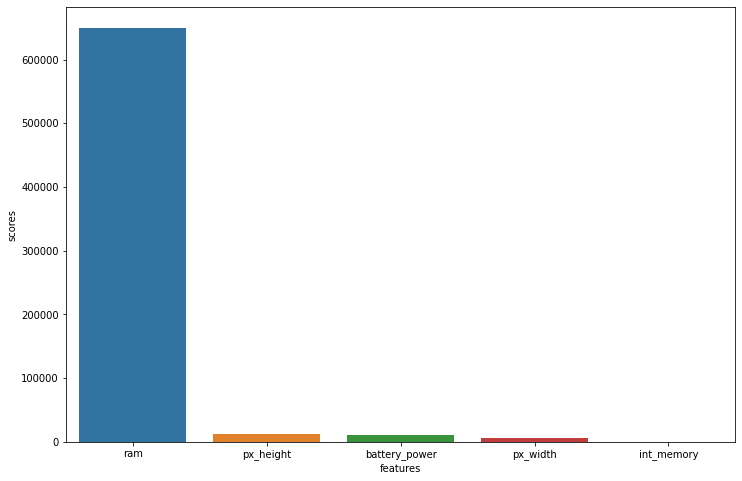

In [96]:
plt.figure(figsize=(12,8))
sns.barplot(top_best_features['features'],top_best_features['scores']);

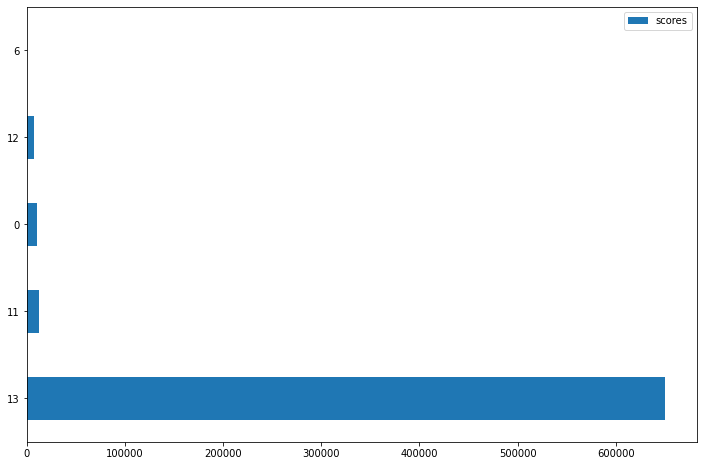

In [85]:
best_features.nlargest(5,'scores').plot.barh(figsize=(12,8));

# Constant Features

In [1]:
from sklearn.feature_selection import VarianceThreshold

In [8]:
v_threshold=VarianceThreshold(threshold=0).fit(X_train)

In [9]:
v_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [10]:
### Finding non constant features
sum(v_threshold.get_support())

20

In [11]:
X_train.columns[v_threshold.get_support()]

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [12]:
len(X_train.columns[v_threshold.get_support()])

20

In [14]:
constant_columns=[column for column in X_train.columns
                 if column not in X_train.columns[v_threshold.get_support()]]

In [15]:
print('Number of constant columns: ', len(constant_columns))

Number of constant columns:  0


In [16]:
for feature in constant_columns:
    print(feature)

# Quasi-Constant Features

In [17]:
quasi_constant_selector=VarianceThreshold(threshold=0.01)
quasi_constant_selector.fit(X_train)

VarianceThreshold(threshold=0.01)

In [18]:
quasi_constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [19]:
# Get features which have the variance greater than the set threshold value=0.01
sum(quasi_constant_selector.get_support())

20

In [20]:
# Now, Let's find constant features which is none (from above)

quasi_constant_columns=[column for column in X_train.columns
                 if column not in X_train.columns[quasi_constant_selector.get_support()]]
print(len(quasi_constant_columns))

0


In [21]:
# List of Quasi Constant features

for column in quasi_constant_columns:
    print(column)

# Correlation Coefficient

In [128]:
corr_matrix=df.corr()
corr_matrix

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


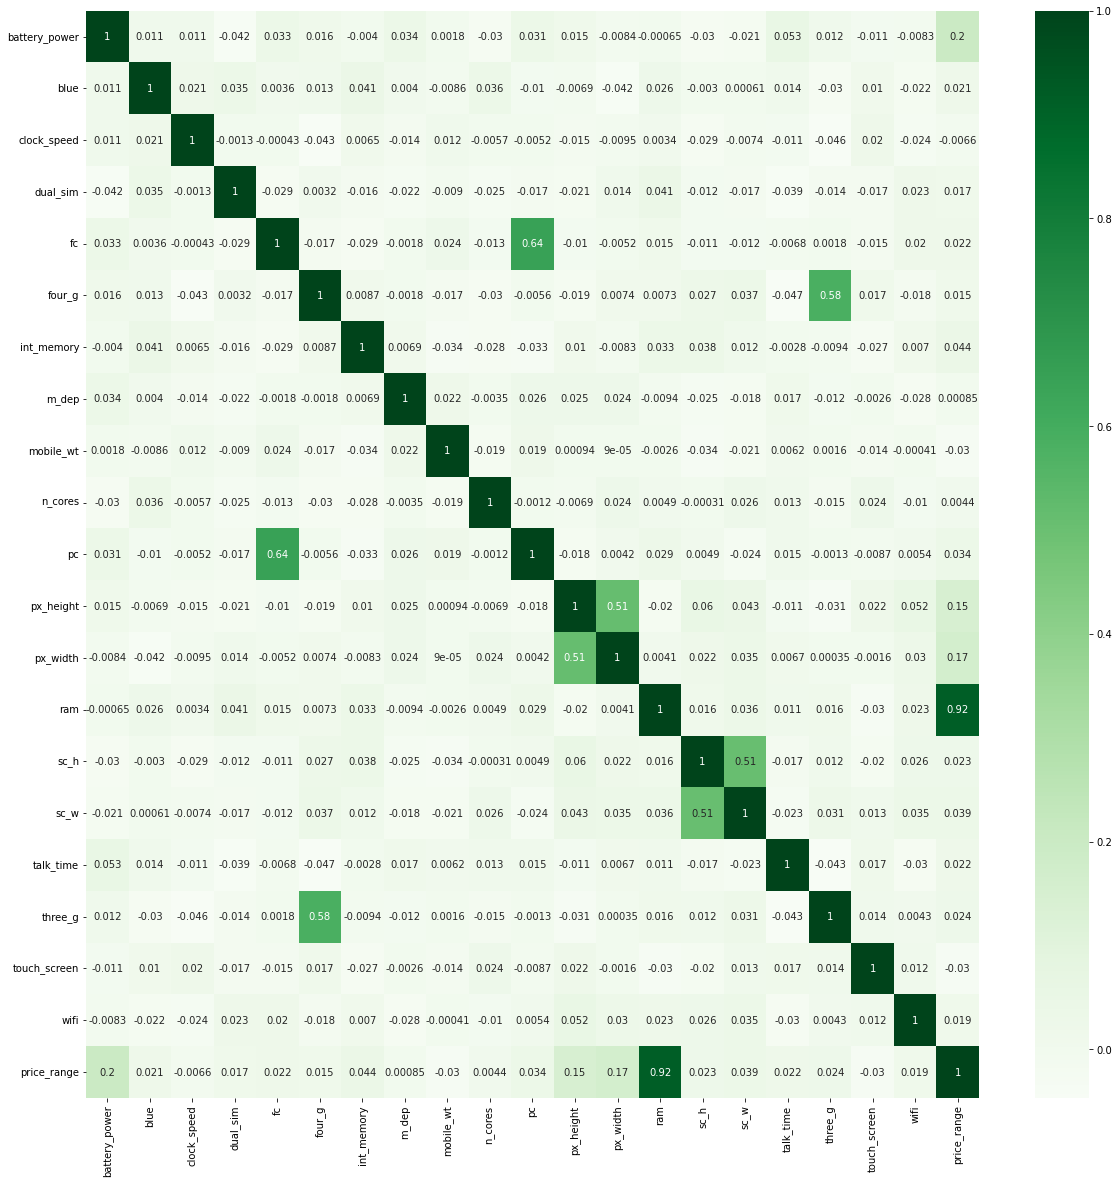

In [142]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens');

**Variance Threshold**

In [153]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [154]:
correlation(df,0.8)

{'price_range'}

In [155]:
correlation(df.iloc[:,:-1],0.8)

set()

# Wrapper Methods:
- Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. 
- The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. - It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. - The wrapper methods usually result in better predictive accuracy than filter methods.

# Forward Feature Selection

In [161]:
!pip install mlxtend

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [169]:
model=RandomForestClassifier(n_estimators=20,random_state=42,n_jobs=-1)

In [179]:
sfs=SequentialFeatureSelector(model,k_features='best',forward=True,
                              floating=False,verbose=2,scoring='accuracy',cv=4,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.9s finished

[2023-01-05 13:10:13] Features: 1/20 -- score: 0.6835714285714285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    2.2s finished

[2023-01-05 13:10:16] Features: 2/20 -- score: 0.7921428571428571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.1s finished

[2023-01-05 13:10:18] Features: 3/20 -- score: 0.8728571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.4s finished

[2023-01-05 13:10:20] Features: 4/20 -- score: 0.8900000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.9s finished



In [181]:
sfs.k_feature_names_

('battery_power', 'blue', 'px_height', 'px_width', 'ram')

In [182]:
sfs.k_feature_idx_

(0, 1, 11, 12, 13)

In [183]:
sfs.k_score_

0.9014285714285715

In [184]:
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.7085714285714285, 0.7171428571428572, 0.642...",0.683571,"(ram,)",0.048941,0.030531,0.017627
2,"(0, 13)","[0.8057142857142857, 0.7857142857142857, 0.805...",0.792143,"(battery_power, ram)",0.023212,0.014481,0.00836
3,"(0, 11, 13)","[0.8971428571428571, 0.8342857142857143, 0.882...",0.872857,"(battery_power, px_height, ram)",0.037558,0.02343,0.013527
4,"(0, 11, 12, 13)","[0.9257142857142857, 0.8714285714285714, 0.888...",0.89,"(battery_power, px_height, px_width, ram)",0.034654,0.021618,0.012481
5,"(0, 1, 11, 12, 13)","[0.9171428571428571, 0.8828571428571429, 0.911...",0.901429,"(battery_power, blue, px_height, px_width, ram)",0.021845,0.013628,0.007868
6,"(0, 1, 3, 11, 12, 13)","[0.9171428571428571, 0.8771428571428571, 0.891...",0.889286,"(battery_power, blue, dual_sim, px_height, px_...",0.028302,0.017656,0.010194
7,"(0, 1, 3, 7, 11, 12, 13)","[0.9085714285714286, 0.8771428571428571, 0.888...",0.883571,"(battery_power, blue, dual_sim, m_dep, px_heig...",0.028302,0.017656,0.010194
8,"(0, 1, 3, 6, 7, 11, 12, 13)","[0.8742857142857143, 0.8714285714285714, 0.874...",0.872143,"(battery_power, blue, dual_sim, int_memory, m_...",0.003797,0.002369,0.001368
9,"(0, 1, 3, 5, 6, 7, 11, 12, 13)","[0.8942857142857142, 0.8971428571428571, 0.874...",0.882857,"(battery_power, blue, dual_sim, four_g, int_me...",0.021236,0.013248,0.007649
10,"(0, 1, 3, 5, 6, 7, 10, 11, 12, 13)","[0.9, 0.8714285714285714, 0.8857142857142857, ...",0.884286,"(battery_power, blue, dual_sim, four_g, int_me...",0.016671,0.0104,0.006005


In [185]:
sfs=SequentialFeatureSelector(model,k_features=5,forward=True,
                              floating=False,verbose=2,scoring='accuracy',cv=4,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s finished

[2023-01-05 13:56:02] Features: 1/5 -- score: 0.6835714285714285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    5.2s finished

[2023-01-05 13:56:08] Features: 2/5 -- score: 0.7921428571428571[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.6s finished

[2023-01-05 13:56:10] Features: 3/5 -- score: 0.8728571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.1s finished

[2023-01-05 13:56:12] Features: 4/5 -- score: 0.8900000000000001[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.9s finished

[202

In [187]:
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(13,)","[0.7085714285714285, 0.7171428571428572, 0.642...",0.683571,"(ram,)",0.048941,0.030531,0.017627
2,"(0, 13)","[0.8057142857142857, 0.7857142857142857, 0.805...",0.792143,"(battery_power, ram)",0.023212,0.014481,0.00836
3,"(0, 11, 13)","[0.8971428571428571, 0.8342857142857143, 0.882...",0.872857,"(battery_power, px_height, ram)",0.037558,0.02343,0.013527
4,"(0, 11, 12, 13)","[0.9257142857142857, 0.8714285714285714, 0.888...",0.89,"(battery_power, px_height, px_width, ram)",0.034654,0.021618,0.012481
5,"(0, 1, 11, 12, 13)","[0.9171428571428571, 0.8828571428571429, 0.911...",0.901429,"(battery_power, blue, px_height, px_width, ram)",0.021845,0.013628,0.007868


# Backward Feature Elimination

In [188]:
bs=SequentialFeatureSelector(model,k_features=5,forward=False,
                             floating=False,verbose=2,scoring='accuracy',cv=4,n_jobs=-1).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s finished

[2023-01-05 14:30:22] Features: 19/5 -- score: 0.8478571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    3.1s finished

[2023-01-05 14:30:25] Features: 18/5 -- score: 0.85[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.8s finished

[2023-01-05 14:30:28] Features: 17/5 -- score: 0.8492857142857142[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    3.6s finished

[2023-01-05 14:30:31] Features: 16/5 -- score: 0.8585714285714285[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    2.6s finished

[2023-01-05 14

In [189]:
bs.k_score_

0.8999999999999999

In [192]:
bs.k_feature_idx_

(0, 11, 12, 13, 19)

In [193]:
bs.k_feature_names_

('battery_power', 'px_height', 'px_width', 'ram', 'wifi')

# Exhaustive Feature Selection (EFS)

In [195]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [ ]:
efs=ExhaustiveFeatureSelector(model,min_features=4,max_features=5,scoring='accuracy',n_jobs=-1).fit(X_train,y_train)

In [ ]:
efs.best_score_

In [ ]:
efs.best_feature_names_

In [ ]:
efs.best_idx_

In [199]:
help(efs)

Help on ExhaustiveFeatureSelector in module mlxtend.feature_selection.exhaustive_feature_selector object:

class ExhaustiveFeatureSelector(sklearn.base.BaseEstimator, sklearn.base.MetaEstimatorMixin)
 |  ExhaustiveFeatureSelector(estimator, min_features=1, max_features=1, print_progress=True, scoring='accuracy', cv=5, n_jobs=1, pre_dispatch='2*n_jobs', clone_estimator=True, fixed_features=None, feature_groups=None)
 |  
 |  Exhaustive Feature Selection for Classification and Regression.
 |     (new in v0.4.3)
 |  
 |  Parameters
 |  ----------
 |  estimator : scikit-learn classifier or regressor
 |  
 |  min_features : int (default: 1)
 |      Minumum number of features to select
 |  
 |  max_features : int (default: 1)
 |      Maximum number of features to select. If parameter `feature_groups` is not
 |      None, the number of features is equal to the number of feature groups, i.e.
 |      `len(feature_groups)`. For  example, if `feature_groups = [[0], [1], [2, 3],
 |      [4]]`, the

# Recursive Feature Elimination

In [200]:
from sklearn.feature_selection import RFE

In [201]:
rfe=RFE(model,n_features_to_select=5,step=1).fit(X_train,y_train)

In [202]:
rfe.ranking_

array([ 1, 12,  5, 11, 10, 16,  1,  7,  2,  9,  3,  1,  1,  1,  6,  8,  4,
       15, 14, 13])

In [203]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [205]:
selected_features=X_train.columns[rfe.support_]
selected_features

Index(['battery_power', 'int_memory', 'px_height', 'px_width', 'ram'], dtype='object')

In [206]:
X_train.columns[rfe.get_support()]

Index(['battery_power', 'int_memory', 'px_height', 'px_width', 'ram'], dtype='object')

In [207]:
X_train.loc[:,rfe.support_]

,battery_power,int_memory,px_height,px_width,ram
836,902,63,364,1360,3654
575,1197,20,214,1710,2885
557,1519,32,168,1239,2912
1235,1971,40,485,922,571
1360,882,28,248,884,751
...,...,...,...,...,...
1130,1975,31,775,1607,3022
1294,589,59,759,1858,362
860,1829,15,729,1267,2080
1459,1927,11,491,1506,2916


# Extra Trees Classifier (Feature importance)

- This is a Model-based approach for selecting the features using the tree-based supervised models to make decisions on the importance of the features. The Extra Tree Classifier or the Extremely Random Tree Classifier is an ensemble algorithm that seeds multiple tree models constructed randomly from the training dataset and sorts out the features that have been most voted for. 
- It fits each decision tree on the whole dataset rather than a bootstrap replica and picks out a split point at random to split the nodes.
- The splitting of nodes occurring at every level of the constituent decision trees is based on the measure of randomness or entropy in the sub-nodes.
- The nodes are split on all variables available in the dataset and the split that results in the most homogenous sub-child is selected in the constituent tree models. This lowers the variance and makes the model less prone to overfitting.

In [208]:
from sklearn.ensemble import ExtraTreesClassifier

In [209]:
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [210]:
model.feature_importances_

array([0.05924505, 0.02117855, 0.03440653, 0.02108485, 0.03344099,
       0.01852755, 0.03789942, 0.03492848, 0.03730318, 0.03367179,
       0.03467818, 0.04665355, 0.04957974, 0.37964311, 0.0346678 ,
       0.03395855, 0.0351894 , 0.01428807, 0.01916274, 0.02049248])

In [212]:
imp_features=pd.Series(model.feature_importances_,index=X_train.columns)
imp_features

battery_power    0.059245
blue             0.021179
clock_speed      0.034407
dual_sim         0.021085
fc               0.033441
four_g           0.018528
int_memory       0.037899
m_dep            0.034928
mobile_wt        0.037303
n_cores          0.033672
pc               0.034678
px_height        0.046654
px_width         0.049580
ram              0.379643
sc_h             0.034668
sc_w             0.033959
talk_time        0.035189
three_g          0.014288
touch_screen     0.019163
wifi             0.020492
dtype: float64

In [213]:
imp_features.nlargest(5)

ram              0.379643
battery_power    0.059245
px_width         0.049580
px_height        0.046654
int_memory       0.037899
dtype: float64

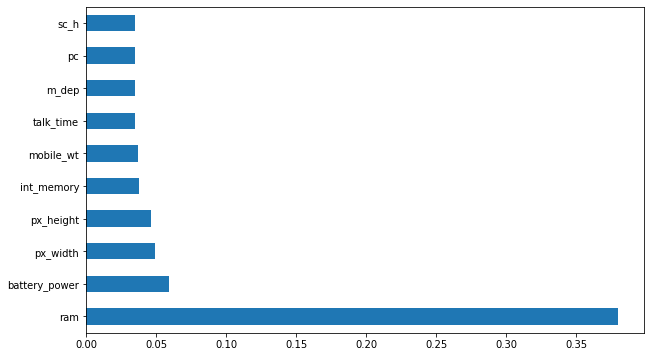

In [218]:
plt.figure(figsize=(10,6))
imp_features.nlargest(10).plot(kind='barh');